In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
full_img=cv2.imread('DATA/sammy.jpg')
full_img=cv2.cvtColor(full_img, cv2.COLOR_BGR2RGB)

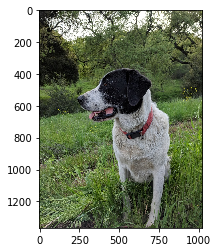

In [3]:
plt.imshow(full_img)

In [4]:
face_img=cv2.imread('DATA/sammy_face.jpg')
face_img=cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

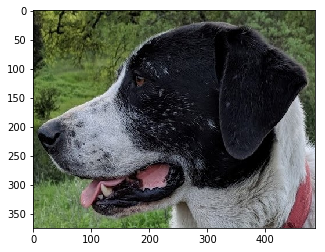

In [5]:
plt.imshow(face_img)

In [6]:
str = 'sum'

eval(str)

<function sum(iterable, start=0, /)>

In [7]:
eval('10*10')

100

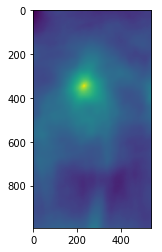

In [8]:
full_copy = full_img.copy()

res = cv2.matchTemplate(full_copy, face_img, cv2.TM_CCOEFF)

plt.imshow(res)

In [9]:
cv2.minMaxLoc(res)

(-735641664.0, 1755028480.0, (0, 10), (231, 345))

In [10]:
methods=['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# Template Matching

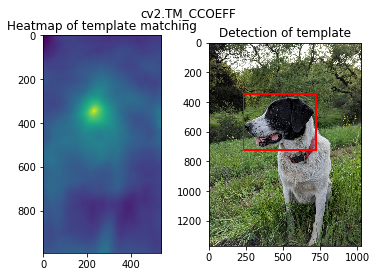

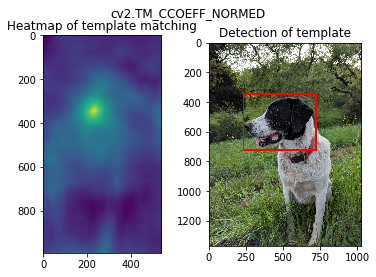

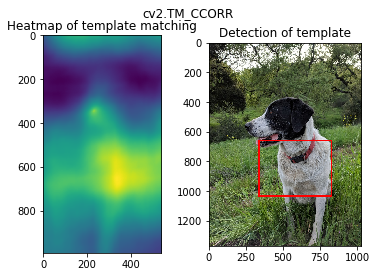

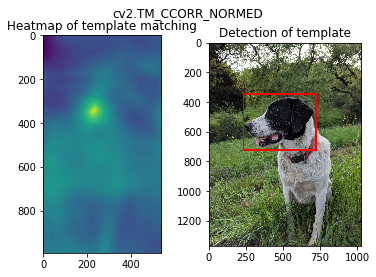

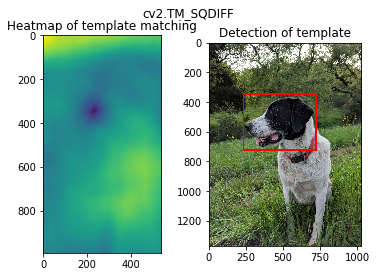

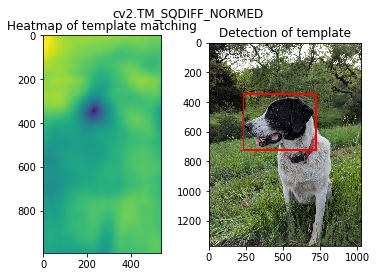

In [11]:
for m in methods:
    
    #Create a copy of image
    full_copy = full_img.copy()
    
    method = eval(m)
    
    #Template matching
    res = cv2.matchTemplate(full_copy, face_img, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    
    height, width, channel = face_img.shape
    
    bottom_right = (top_left[0] + width, top_left[1] + height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, (255, 0, 0), 10)
    
    #Plot the images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Heatmap of template matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of template')
    
    plt.suptitle(m)
    
    plt.show()
    
    print('\n')

# Corner Detection

## 1. Harris Corner Detection

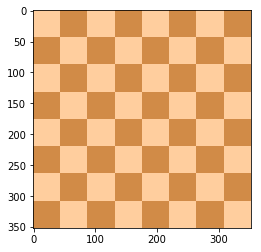

In [12]:
flat_chess=cv2.imread('DATA/flat_chessboard.png')
flat_chess=cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

plt.imshow(flat_chess)

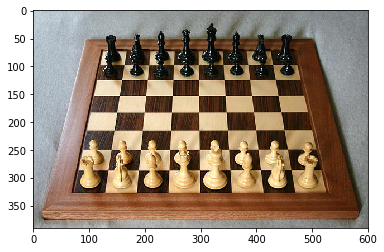

In [13]:
real_chess=cv2.imread('DATA/real_chessboard.jpg')
real_chess=cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

plt.imshow(real_chess)

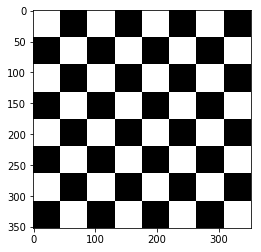

In [14]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_flat_chess, cmap='gray')

In [15]:
gray = np.float32(gray_flat_chess)
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)
dst = cv2.dilate(dst, None)
flat_chess[dst>0.01*dst.max()] = [255, 0, 0]

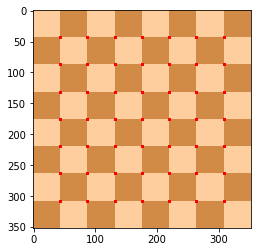

In [16]:
plt.imshow(flat_chess)

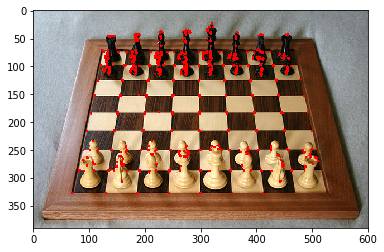

In [17]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)
dst = cv2.dilate(dst, None)
real_chess[dst>0.01*dst.max()] = [255, 0, 0]
plt.imshow(real_chess)

## 2. Shi-Tomasi Corner Detection

In [18]:
flat_chess=cv2.imread('DATA/flat_chessboard.png')
flat_chess=cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

real_chess=cv2.imread('DATA/real_chessboard.jpg')
real_chess=cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)

In [19]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess, 64, 0.01, 10)
corners = np.int0(corners)

In [20]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess, (x,y), 3, (255, 0, 0), -1)

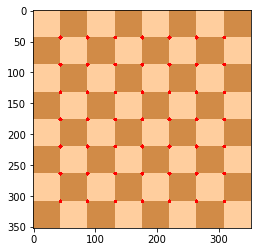

In [21]:
plt.imshow(flat_chess)

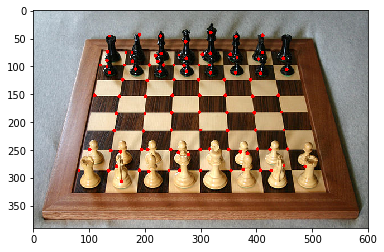

In [22]:
corners = cv2.goodFeaturesToTrack(gray_real_chess, 100, 0.01, 10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess, (x,y), 3, (255, 0, 0), -1)

    
plt.imshow(real_chess)

# Edge Detection - Canny Edge Detector